In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           4062         76  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           3259         81  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          11438        204  1.0              
teocalvo/teomewhy-loyalty-system                                T

In [ ]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
100% 178M/178M [00:08<00:00, 23.1MB/s]
100% 178M/178M [00:08<00:00, 20.8MB/s]


In [ ]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('onlinefraud.csv')
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

###**Basic Analysis**
*Main Data-Set = df*



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [ ]:
df.value_counts("type")

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df[df['isFraud'] == 1]['isFraud'].count()

8213

In [ ]:
df[df['isFraud'] == 0]['isFraud'].count()

6354407

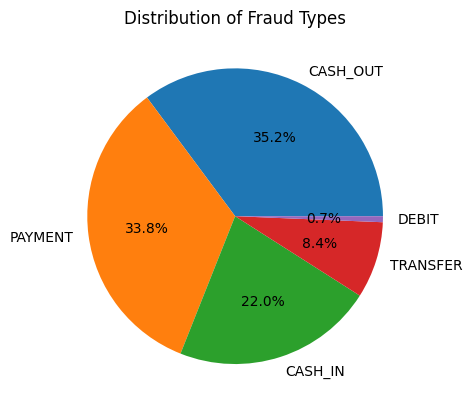

In [ ]:
type_counts = df.value_counts("type")
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fraud Types')
plt.show()

In [ ]:
df2 = pd.get_dummies(df, columns=['type'], prefix='')

# Print the head of the dataframe with dummy variables
df2.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  \
0             0.0             0.0        0               0     False   
1             0.0             0.0        0               0     False   
2             0.0             0.0        1               0     False   
3         21182.0             0.0        1               0     False   
4             0.0             0.0        0               0     False   

   _CASH_OUT  _DEBIT  _PAYMENT  _TRANSFER  
0      False   False      True      False  
1      False   False      True      False  
2      False   False     False       True  
3       True   False     False      False  
4      False   False      True      False

In [ ]:
df2['initial_of_dest'] = df2['nameDest'].str[0]
df2.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  \
0             0.0             0.0        0               0     False   
1             0.0             0.0        0               0     False   
2             0.0             0.0        1               0     False   
3         21182.0             0.0        1               0     False   
4             0.0             0.0        0               0     False   

   _CASH_OUT  _DEBIT  _PAYMENT  _TRANSFER initial_of_dest  
0      False   False      True      False               M  
1      False   False      True      False               M  
2      False   False     False       True               C  
3       True   False     False      False               C  
4      False   False      True      False               M

In [ ]:
df2 = pd.get_dummies(df2, columns=['initial_of_dest'], prefix='')
df2.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  \
0             0.0             0.0        0               0     False   
1             0.0             0.0        0               0     False   
2             0.0             0.0        1               0     False   
3         21182.0             0.0        1               0     False   
4             0.0             0.0        0               0     False   

   _CASH_OUT  _DEBIT  _PAYMENT  _TRANSFER     _C     _M  
0      False   False      True      False  False   True  
1      False   False      True      False  False   True  
2      False   False     False       True   True  False  
3       True   False     False      False   True  False  
4      False   False      True      False  False   True

In [ ]:
df2.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', '_CASH_IN', '_CASH_OUT', '_DEBIT', '_PAYMENT',
       '_TRANSFER', '_C', '_M'],
      dtype='object')

In [ ]:
cols_to_norm = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

df2[cols_to_norm] = df2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df2

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         0.0  0.000106  C1231006815       0.002855        0.003233   
1         0.0  0.000020  C1666544295       0.000357        0.000391   
2         0.0  0.000002  C1305486145       0.000003        0.000000   
3         0.0  0.000002   C840083671       0.000003        0.000000   
4         0.0  0.000126  C2048537720       0.000697        0.000603   
...       ...       ...          ...            ...             ...   
6362615   1.0  0.003674   C786484425       0.005701        0.000000   
6362616   1.0  0.068272  C1529008245       0.105923        0.000000   
6362617   1.0  0.068272  C1162922333       0.105923        0.000000   
6362618   1.0  0.009195  C1685995037       0.014265        0.000000   
6362619   1.0  0.009195  C1280323807       0.014265        0.000000   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155        0.000000        0.000000        0               0   
1        M2044282225        0.000000        0.000000        0               0   
2         C553264065        0.000000        0.000000        1               0   
3          C38997010        0.000059        0.000000        1               0   
4        M1230701703        0.000000        0.000000        0               0   
...              ...             ...             ...      ...             ...   
6362615   C776919290        0.000000        0.000954        1               0   
6362616  C1881841831        0.000000        0.000000        1               0   
6362617  C1365125890        0.000192        0.017912        1               0   
6362618  C2080388513        0.000000        0.000000        1               0   
6362619   C873221189        0.018286        0.020664        1               0   

         _CASH_IN  _CASH_OUT  _DEBIT  _PAYMENT  _TRANSFER     _C     _M  
0           False      False   False      True      False  False   True  
1           False      False   False      True      False  False   True  
2           False      False   False     False       True   True  False  
3           False       True   False     False      False   True  False  
4           False      False   False      True      False  False   True  
...           ...        ...     ...       ...        ...    ...    ...  
6362615     False       True   False     False      False   True  False  
6362616     False      False   False     False       True   True  False  
6362617     False       True   False     False      False   True  False  
6362618     False      False   False     False       True   True  False  
6362619     False       True   False     False      False   True  False  

[6362620 rows x 17 columns]

In [ ]:
df2.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   3.266809e-01  1.945599e-03   1.399484e-02    1.724540e-02   
std    1.918221e-01  6.532045e-03   4.847261e-02    5.897038e-02   
min    0.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    2.088949e-01  1.448374e-04   0.000000e+00    0.000000e+00   
50%    3.207547e-01  8.099034e-04   2.384491e-04    0.000000e+00   
75%    4.501348e-01  2.257778e-03   1.801042e-03    2.909313e-03   
max    1.000000e+00  1.000000e+00   1.000000e+00    1.000000e+00   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     3.091721e-03    3.439269e-03  1.290820e-03    2.514687e-06  
std      9.547833e-03    1.031539e-02  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      3.727521e-04    6.026781e-04  0.000000e+00    0.000000e+00  
75%      2.648861e-03    3.121768e-03  0.000000e+00    0.000000e+00  
max      1.000000e+00    1.000000e+00  1.000000e+00    1.000000e+00

nameOrig is Useless as max to max a account number is havinig 3 transaction so not useful in EDA


In [ ]:
df2

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         0.0  0.000106  C1231006815       0.002855        0.003233   
1         0.0  0.000020  C1666544295       0.000357        0.000391   
2         0.0  0.000002  C1305486145       0.000003        0.000000   
3         0.0  0.000002   C840083671       0.000003        0.000000   
4         0.0  0.000126  C2048537720       0.000697        0.000603   
...       ...       ...          ...            ...             ...   
6362615   1.0  0.003674   C786484425       0.005701        0.000000   
6362616   1.0  0.068272  C1529008245       0.105923        0.000000   
6362617   1.0  0.068272  C1162922333       0.105923        0.000000   
6362618   1.0  0.009195  C1685995037       0.014265        0.000000   
6362619   1.0  0.009195  C1280323807       0.014265        0.000000   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0        M1979787155        0.000000        0.000000        0               0   
1        M2044282225        0.000000        0.000000        0               0   
2         C553264065        0.000000        0.000000        1               0   
3          C38997010        0.000059        0.000000        1               0   
4        M1230701703        0.000000        0.000000        0               0   
...              ...             ...             ...      ...             ...   
6362615   C776919290        0.000000        0.000954        1               0   
6362616  C1881841831        0.000000        0.000000        1               0   
6362617  C1365125890        0.000192        0.017912        1               0   
6362618  C2080388513        0.000000        0.000000        1               0   
6362619   C873221189        0.018286        0.020664        1               0   

         _CASH_IN  _CASH_OUT  _DEBIT  _PAYMENT  _TRANSFER     _C     _M  
0           False      False   False      True      False  False   True  
1           False      False   False      True      False  False   True  
2           False      False   False     False       True   True  False  
3           False       True   False     False      False   True  False  
4           False      False   False      True      False  False   True  
...           ...        ...     ...       ...        ...    ...    ...  
6362615     False       True   False     False      False   True  False  
6362616     False      False   False     False       True   True  False  
6362617     False       True   False     False      False   True  False  
6362618     False      False   False     False       True   True  False  
6362619     False       True   False     False      False   True  False  

[6362620 rows x 17 columns]

In [ ]:
df2 = df2.drop(columns= ['nameOrig','nameDest','_M'])

In [ ]:
df2.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', '_CASH_IN', '_CASH_OUT',
       '_DEBIT', '_PAYMENT', '_TRANSFER', '_C'],
      dtype='object')

In [ ]:
correlation = df2.corr()
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
_TRANSFER         0.053869
isFlaggedFraud    0.044109
step              0.031578
_C                0.025697
_CASH_OUT         0.011256
oldbalanceOrg     0.010154
newbalanceDest    0.000535
_DEBIT           -0.002911
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
_CASH_IN         -0.019089
_PAYMENT         -0.025697
Name: isFraud, dtype: float64

In [ ]:
df_only_fraud = df2[df2['isFraud'] == 1]
df_only_fraud

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2         0.0  0.000002       0.000003             0.0        0.000000   
3         0.0  0.000002       0.000003             0.0        0.000059   
251       0.0  0.000030       0.000047             0.0        0.000000   
252       0.0  0.000030       0.000047             0.0        0.000074   
680       0.0  0.000218       0.000338             0.0        0.000000   
...       ...       ...            ...             ...             ...   
6362615   1.0  0.003674       0.005701             0.0        0.000000   
6362616   1.0  0.068272       0.105923             0.0        0.000000   
6362617   1.0  0.068272       0.105923             0.0        0.000192   
6362618   1.0  0.009195       0.014265             0.0        0.000000   
6362619   1.0  0.009195       0.014265             0.0        0.018286   

         newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  _CASH_OUT  _DEBIT  \
2              0.000000        1               0     False      False   False   
3              0.000000        1               0     False       True   False   
251            0.000000        1               0     False      False   False   
252            0.000000        1               0     False       True   False   
680            0.000000        1               0     False      False   False   
...                 ...      ...             ...       ...        ...     ...   
6362615        0.000954        1               0     False       True   False   
6362616        0.000000        1               0     False      False   False   
6362617        0.017912        1               0     False       True   False   
6362618        0.000000        1               0     False      False   False   
6362619        0.020664        1               0     False       True   False   

         _PAYMENT  _TRANSFER    _C  
2           False       True  True  
3           False      False  True  
251         False       True  True  
252         False      False  True  
680         False       True  True  
...           ...        ...   ...  
6362615     False      False  True  
6362616     False       True  True  
6362617     False      False  True  
6362618     False       True  True  
6362619     False      False  True  

[8213 rows x 14 columns]

In [ ]:
df_only_non_fraud = df2[df2['isFraud'] == 0]
df_only_non_fraud

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        0.000000  0.000106       0.002855        0.003233         0.00000   
1        0.000000  0.000020       0.000357        0.000391         0.00000   
4        0.000000  0.000126       0.000697        0.000603         0.00000   
5        0.000000  0.000085       0.000904        0.000929         0.00000   
6        0.000000  0.000077       0.003075        0.003551         0.00000   
...           ...       ...            ...             ...             ...   
6362319  0.966307  0.000093       0.008707        0.010289         0.00000   
6362320  0.966307  0.001722       0.000065        0.000000         0.00000   
6362321  0.966307  0.002015       0.002820        0.000000         0.00007   
6362322  0.966307  0.000888       0.000226        0.000000         0.00000   
6362323  0.966307  0.000020       0.000343        0.000374         0.00053   

         newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  _CASH_OUT  _DEBIT  \
0              0.000000        0               0     False      False   False   
1              0.000000        0               0     False      False   False   
4              0.000000        0               0     False      False   False   
5              0.000000        0               0     False      False   False   
6              0.000000        0               0     False      False   False   
...                 ...      ...             ...       ...        ...     ...   
6362319        0.000000        0               0     False      False   False   
6362320        0.000447        0               0     False       True   False   
6362321        0.000593        0               0     False       True   False   
6362322        0.000230        0               0     False      False   False   
6362323        0.000535        0               0     False      False    True   

         _PAYMENT  _TRANSFER     _C  
0            True      False  False  
1            True      False  False  
4            True      False  False  
5            True      False  False  
6            True      False  False  
...           ...        ...    ...  
6362319      True      False  False  
6362320     False      False   True  
6362321     False      False   True  
6362322     False       True   True  
6362323     False      False   True  

[6354407 rows x 14 columns]

In [ ]:
for col in ['_CASH_IN', '_CASH_OUT', '_DEBIT', '_PAYMENT', '_TRANSFER']:
    count = df_only_fraud[df_only_fraud[col] == True][col].count()
    print(f"Count of True in {col}: {count}")

Count of True in _CASH_IN: 0
Count of True in _CASH_OUT: 4116
Count of True in _DEBIT: 0
Count of True in _PAYMENT: 0
Count of True in _TRANSFER: 4097


In [ ]:
MLdf = pd.concat([df_only_fraud, df_only_non_fraud.sample(n=df_only_fraud.shape[0])])
MLdf

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2        0.000000  0.000002       0.000003        0.000000        0.000000   
3        0.000000  0.000002       0.000003        0.000000        0.000059   
251      0.000000  0.000030       0.000047        0.000000        0.000000   
252      0.000000  0.000030       0.000047        0.000000        0.000074   
680      0.000000  0.000218       0.000338        0.000000        0.000000   
...           ...       ...            ...             ...             ...   
2118095  0.245283  0.000055       0.002658        0.003091        0.000000   
3387402  0.342318  0.000925       0.001703        0.003771        0.000821   
5557408  0.514825  0.000021       0.000009        0.000000        0.000000   
861013   0.055256  0.000145       0.000360        0.000161        0.000000   
657359   0.045822  0.002416       0.000000        0.000000        0.001016   

         newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  _CASH_OUT  _DEBIT  \
2               0.00000        1               0     False      False   False   
3               0.00000        1               0     False       True   False   
251             0.00000        1               0     False      False   False   
252             0.00000        1               0     False       True   False   
680             0.00000        1               0     False      False   False   
...                 ...      ...             ...       ...        ...     ...   
2118095         0.00000        0               0     False      False   False   
3387402         0.00058        0               0      True      False   False   
5557408         0.00000        0               0     False      False   False   
861013          0.00000        0               0     False      False   False   
657359          0.00116        0               0     False       True   False   

         _PAYMENT  _TRANSFER     _C  
2           False       True   True  
3           False      False   True  
251         False       True   True  
252         False      False   True  
680         False       True   True  
...           ...        ...    ...  
2118095      True      False  False  
3387402     False      False   True  
5557408      True      False  False  
861013       True      False  False  
657359      False      False   True  

[16426 rows x 14 columns]

All the frauds are in Cash_Out and Transfer which is Understandable 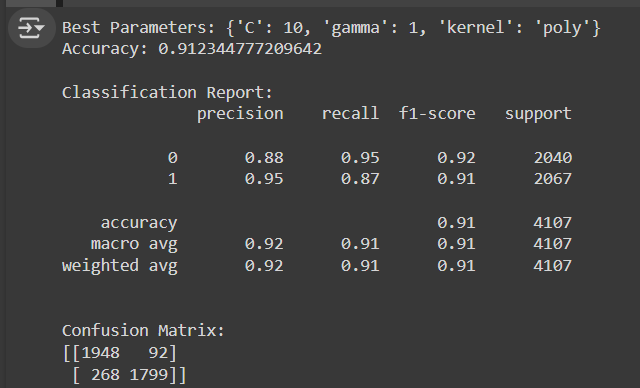

In [ ]:
from sklearn.model_selection import train_test_split

X = MLdf.drop('isFraud', axis=1)
y = MLdf['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12319, 13)
X_test shape: (4107, 13)
y_train shape: (12319,)
y_test shape: (4107,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# XGBoost
!pip install xgboost
import xgboost as xgb

# LightGBM
!pip install lightgbm
import lightgbm as lgb

In [ ]:
modelLR = LogisticRegression()

In [ ]:
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
accuracyLR = accuracy_score(y_test, y_predLR)
print("AccuracyLR:", accuracyLR)
print("\nClassification ReportLR:")
print(classification_report(y_test, y_predLR))

print("\nConfusion MatrixLR:")
print(confusion_matrix(y_test, y_predLR))

AccuracyLR: 0.804236669101534

Classification ReportLR:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      2040
           1       0.77      0.88      0.82      2067

    accuracy                           0.80      4107
   macro avg       0.81      0.80      0.80      4107
weighted avg       0.81      0.80      0.80      4107


Confusion MatrixLR:
[[1494  546]
 [ 258 1809]]


Linear Regression models gives Accuracy = 81.6 %  

In [ ]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)
y_predRF = modelRF.predict(X_test)
accuracyRF = accuracy_score(y_test, y_predRF)
print("AccuracyRF:", accuracyRF)
print("\nClassification ReportRF:")
print(classification_report(y_test, y_predRF))

print("\nConfusion MatrixRF:")
print(confusion_matrix(y_test, y_predRF))

AccuracyRF: 0.990990990990991

Classification ReportRF:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2040
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107


Confusion MatrixRF:
[[2013   27]
 [  10 2057]]


Random Forest Gives Accuracy as 98-99% on multiple Tests

In [ ]:
modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train, y_train)
y_predXGB = modelXGB.predict(X_test)
accuracyXGB = accuracy_score(y_test, y_predXGB)
print("AccuracyXGB:", accuracyXGB)
print("\nClassification ReportXGB:")
print(classification_report(y_test, y_predXGB))

print("\nConfusion MatrixXGB:")
print(confusion_matrix(y_test, y_predXGB))

AccuracyXGB: 0.9914779644509374

Classification ReportXGB:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2040
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107


Confusion MatrixXGB:
[[2013   27]
 [   8 2059]]


Best Accuracy So far with xgb = 99.3% +


In [ ]:
modelLGBM = lgb.LGBMClassifier()
modelLGBM.fit(X_train, y_train)
y_predLGBM = modelLGBM.predict(X_test)
accuracyLGBM = accuracy_score(y_test, y_predLGBM)
print("AccuracyLGBM:", accuracyLGBM)
print("\nClassification ReportLGBM:")
print(classification_report(y_test, y_predLGBM))

print("\nConfusion MatrixLGBM:")
print(confusion_matrix(y_test, y_predLGBM))

[LightGBM] [Info] Number of positive: 6146, number of negative: 6173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1542
[LightGBM] [Info] Number of data points in the train set: 12319, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498904 -> initscore=-0.004383
[LightGBM] [Info] Start training from score -0.004383
AccuracyLGBM: 0.9929388848307767

Classification ReportLGBM:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2040
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107


Confusion MatrixLGBM:
[[2018   22]
 [   7 2060]]


More Accurate than xgb with accuracy 99.36 %

In [ ]:
from sklearn.svm import SVC

modelSVM = SVC()
modelSVM.fit(X_train, y_train)
y_predSVM = modelSVM.predict(X_test)
accuracySVM = accuracy_score(y_test, y_predSVM)
print("AccuracySVM:", accuracySVM)
print("\nClassification ReportSVM:")
print(classification_report(y_test, y_predSVM))

print("\nConfusion MatrixSVM:")
print(confusion_matrix(y_test, y_predSVM))

AccuracySVM: 0.8344290236182128

Classification ReportSVM:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2040
           1       0.87      0.79      0.83      2067

    accuracy                           0.83      4107
   macro avg       0.84      0.83      0.83      4107
weighted avg       0.84      0.83      0.83      4107


Confusion MatrixSVM:
[[1799  241]
 [ 439 1628]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = ['LR', 'RF', 'XGB', 'LGBM', 'SVM']
y_preds = [y_predLR, y_predRF, y_predXGB, y_predLGBM, y_predSVM]

for model, y_pred in zip(models, y_preds):
  print(f"Model {model}:")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred))
  print("Recall:", recall_score(y_test, y_pred))
  print("F1-score:", f1_score(y_test, y_pred))
  print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
  print("--------------------")

Model LR:
Accuracy: 0.804236669101534
Precision: 0.7681528662420383
Recall: 0.8751814223512336
F1-score: 0.8181818181818182
ROC AUC Score: 0.8037671817638521
--------------------
Model RF:
Accuracy: 0.990990990990991
Precision: 0.9870441458733206
Recall: 0.9951620706337687
F1-score: 0.991086485184293
ROC AUC Score: 0.9909633882580609
--------------------
Model XGB:
Accuracy: 0.9914779644509374
Precision: 0.9870565675934804
Recall: 0.996129656507015
F1-score: 0.9915723573320492
ROC AUC Score: 0.991447181194684
--------------------
Model LGBM:
Accuracy: 0.9929388848307767
Precision: 0.989433237271854
Recall: 0.9966134494436382
F1-score: 0.9930103639431188
ROC AUC Score: 0.9929145678590741
--------------------
Model SVM:
Accuracy: 0.8344290236182128
Precision: 0.8710540395933655
Recall: 0.787614900822448
F1-score: 0.8272357723577236
ROC AUC Score: 0.8347388229602436
--------------------


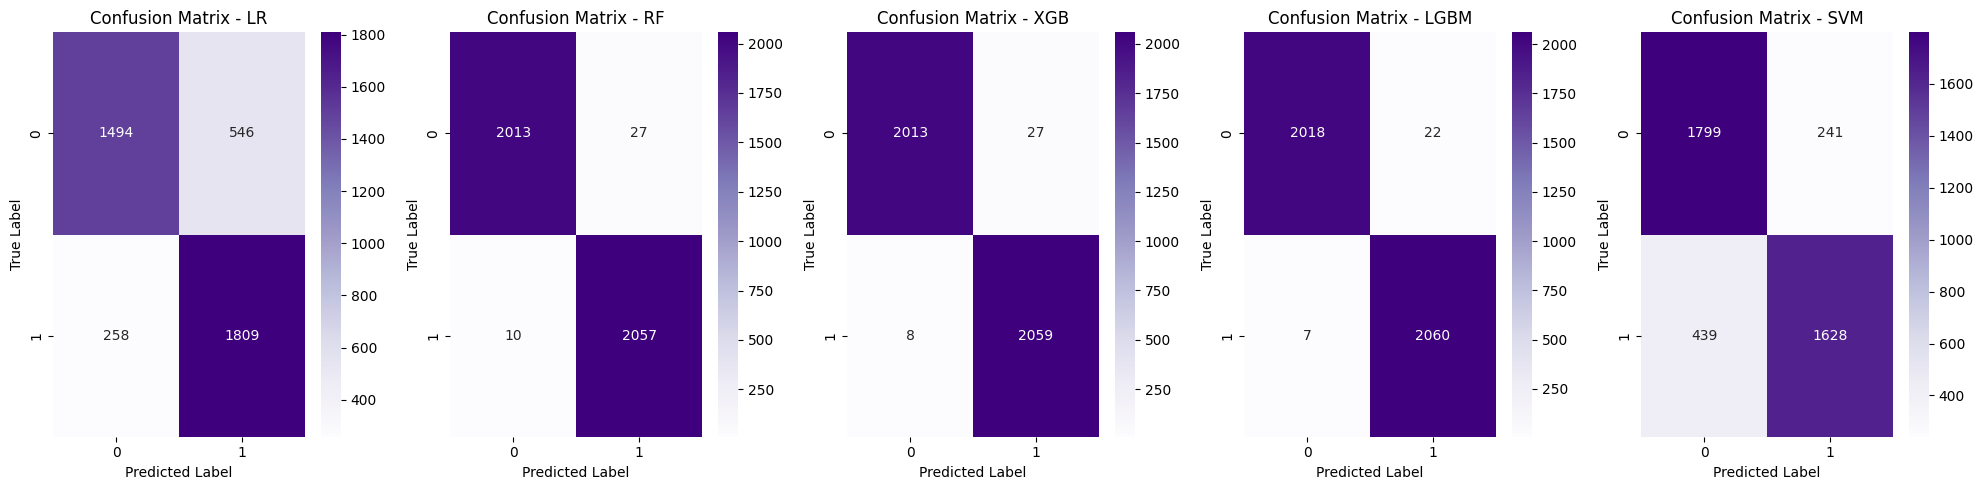

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = ['LR', 'RF', 'XGB', 'LGBM', 'SVM']
y_preds = [y_predLR, y_predRF, y_predXGB, y_predLGBM, y_predSVM]

fig, axes = plt.subplots(1, len(models), figsize=(20, 5))

for i, (model, y_pred) in enumerate(zip(models, y_preds)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 11.0 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.Explainer(modelXGB)
shap_values = explainer(X_test)

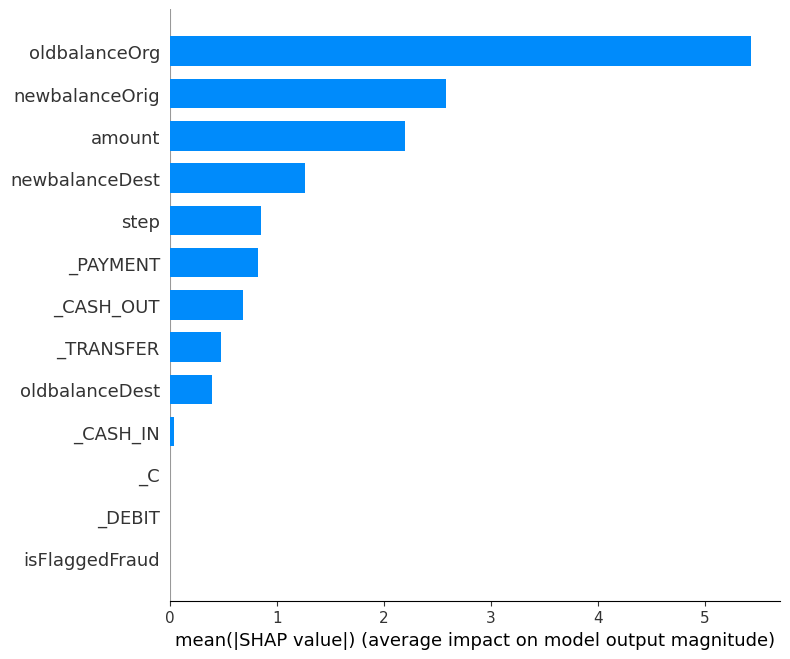

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Prediciton number: 0
0 0
-----------------------------


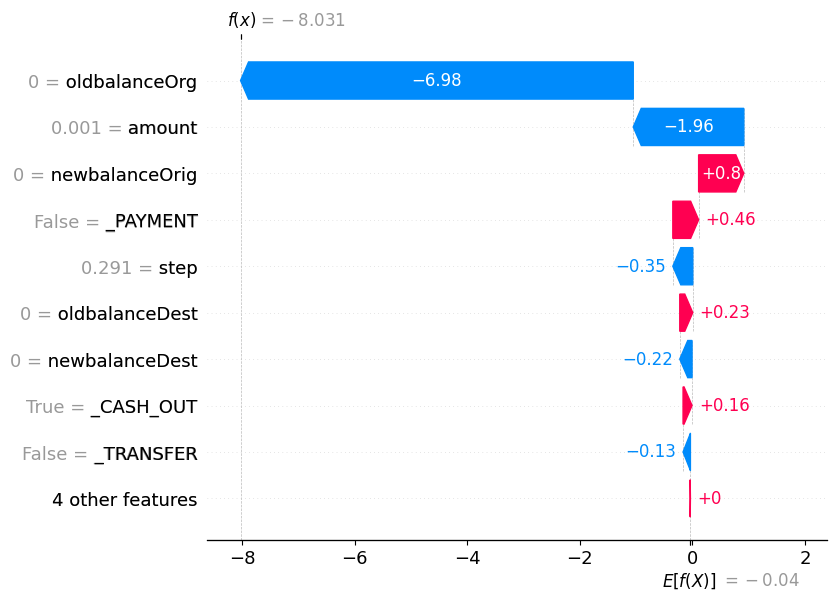

Prediciton number: 1
0 0
-----------------------------


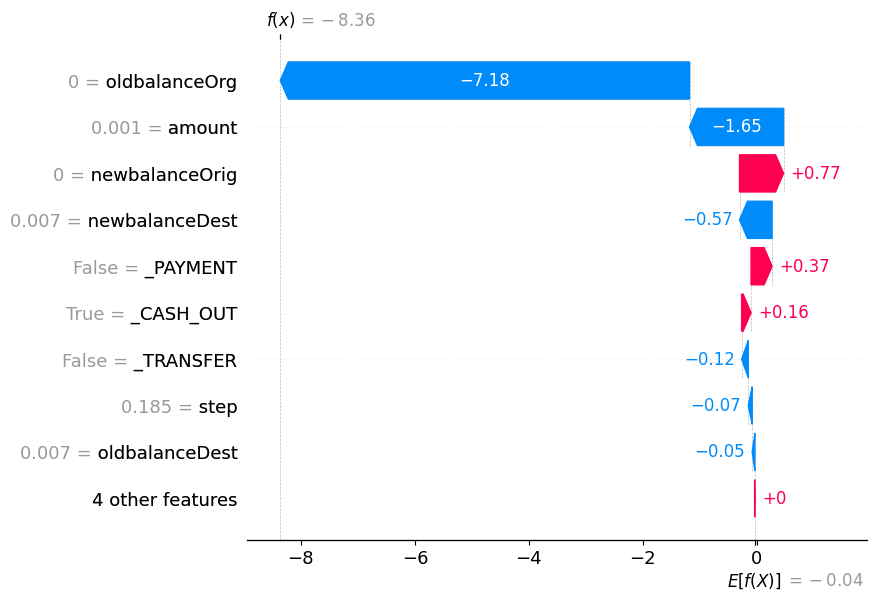

Prediciton number: 2
1 1
-----------------------------


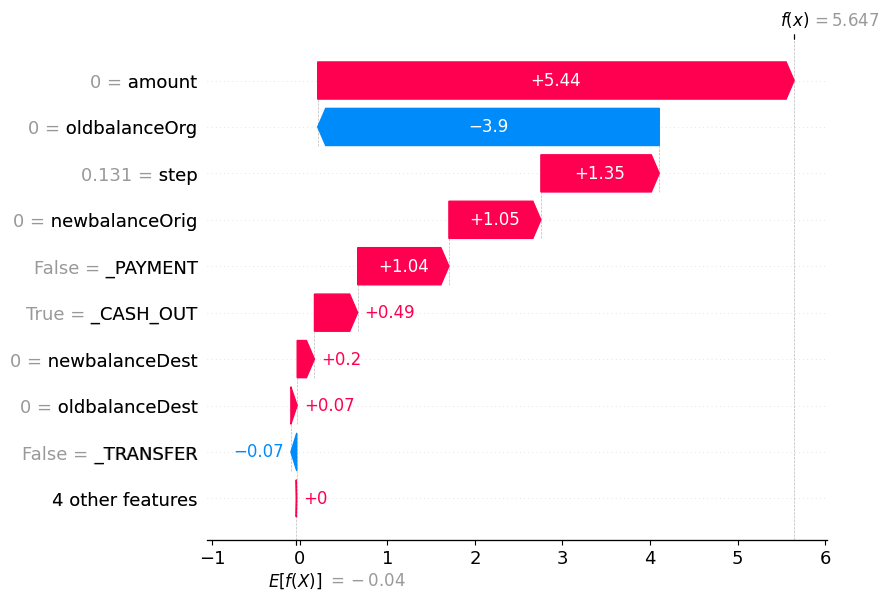

Prediciton number: 3
1 1
-----------------------------


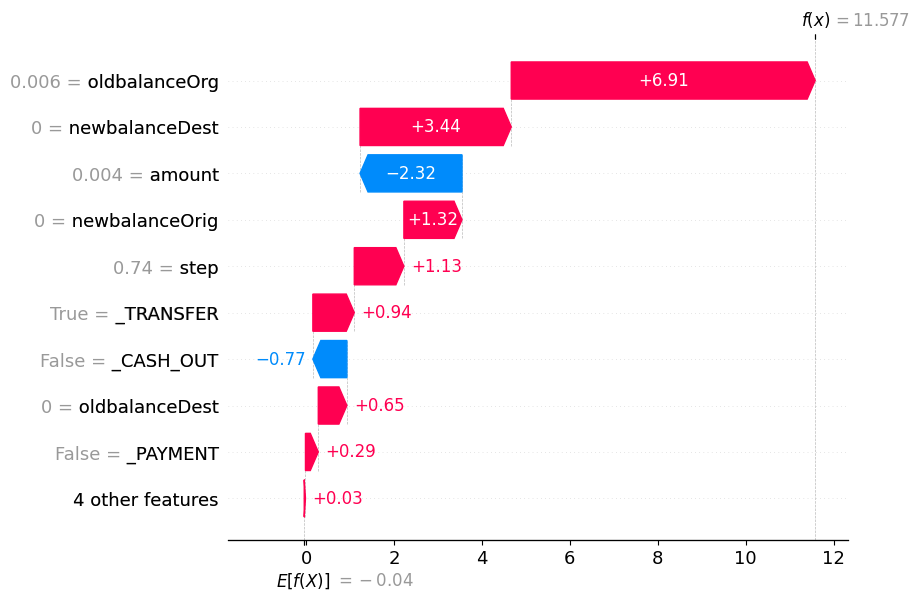

Prediciton number: 4
1 1
-----------------------------


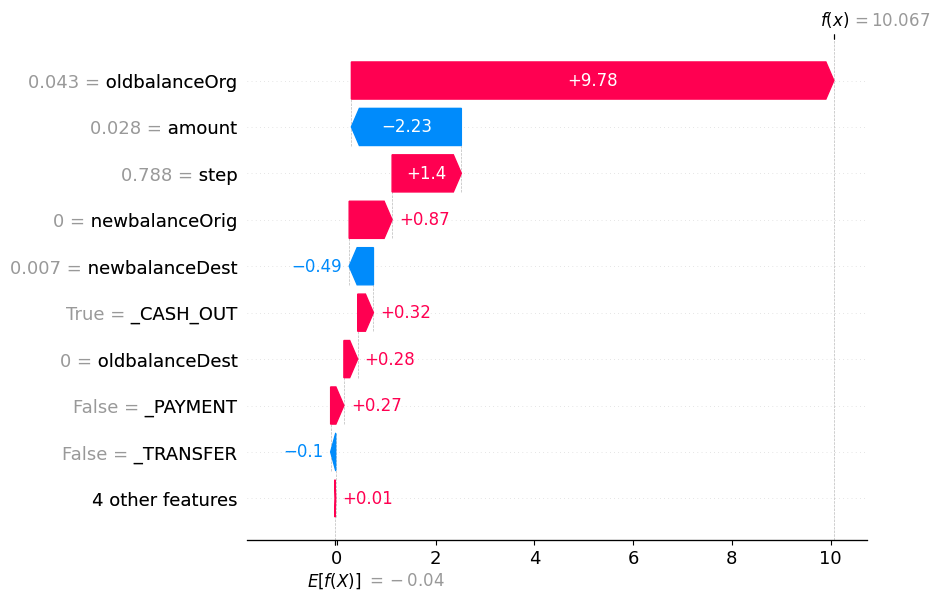

In [ ]:
for i in range(5):
  print("Prediciton number:" , i)
  print(y_predXGB[i], y_test.iloc[i])
  print("-----------------------------")
  shap.plots.waterfall(shap_values[i])

SHAP on LGBM

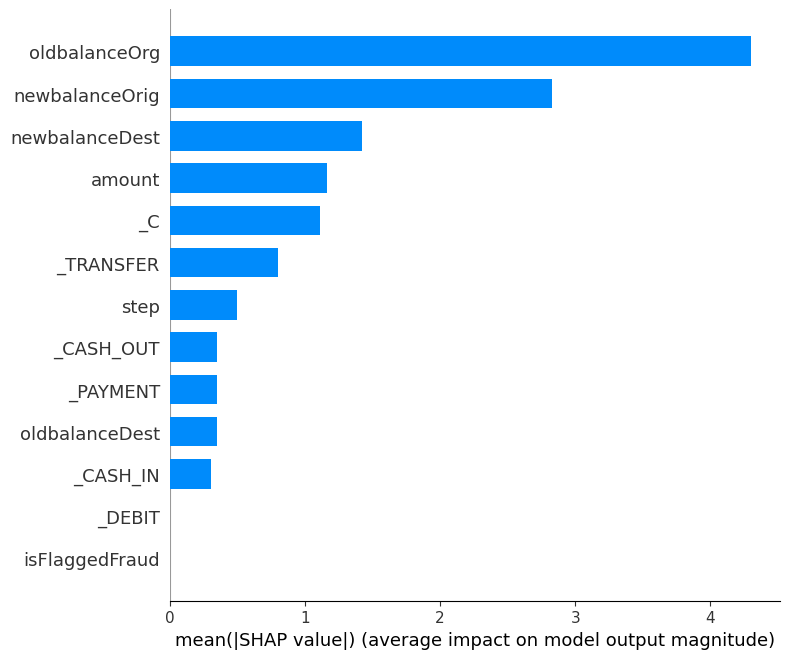

In [ ]:
explainer_2 = shap.Explainer(modelLGBM)
shap_values_2 = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Prediciton number: 0
0 0
-----------------------------


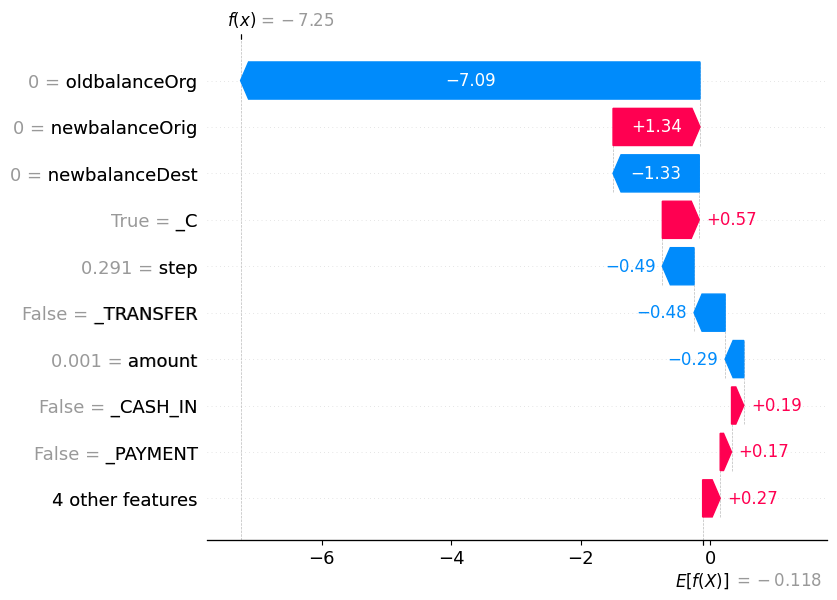

Prediciton number: 1
0 0
-----------------------------


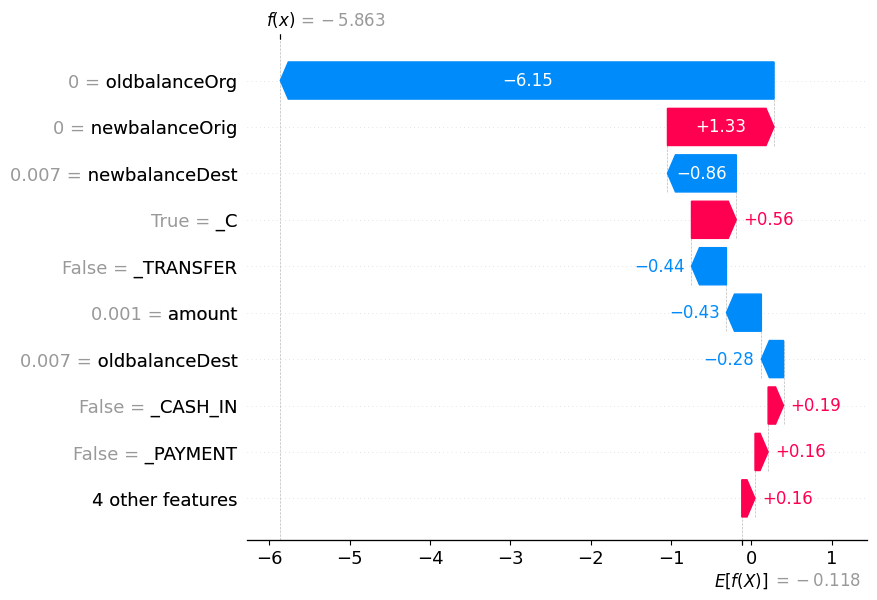

Prediciton number: 2
1 1
-----------------------------


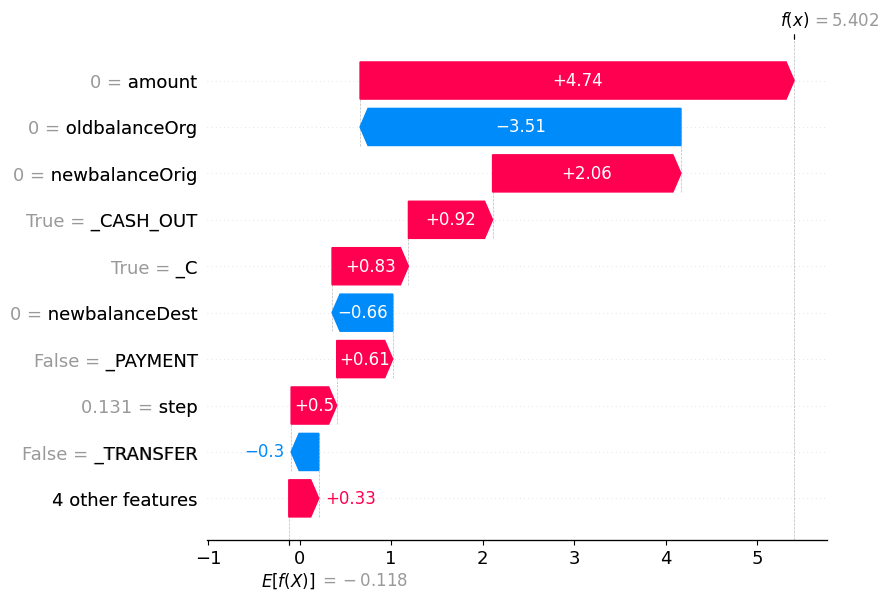

Prediciton number: 3
1 1
-----------------------------


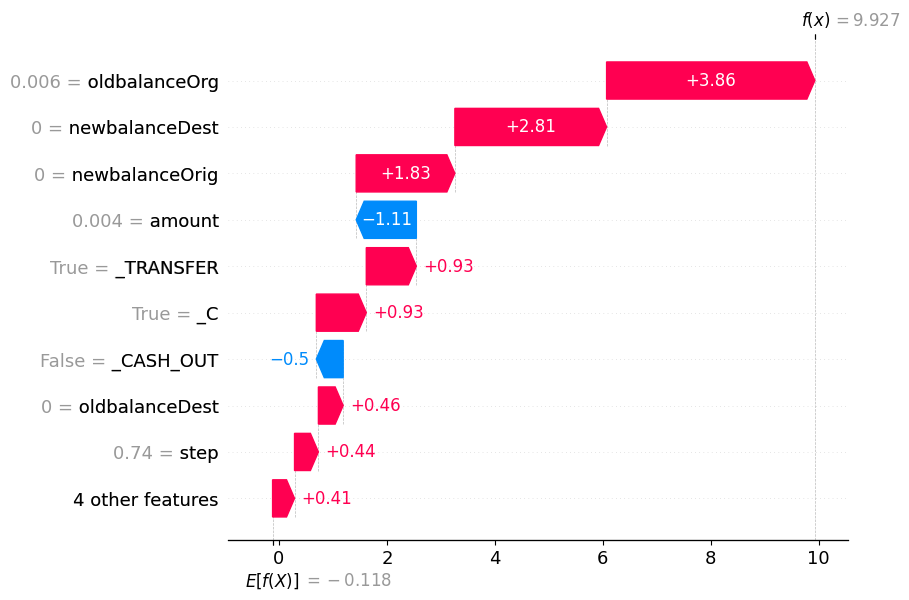

Prediciton number: 4
1 1
-----------------------------


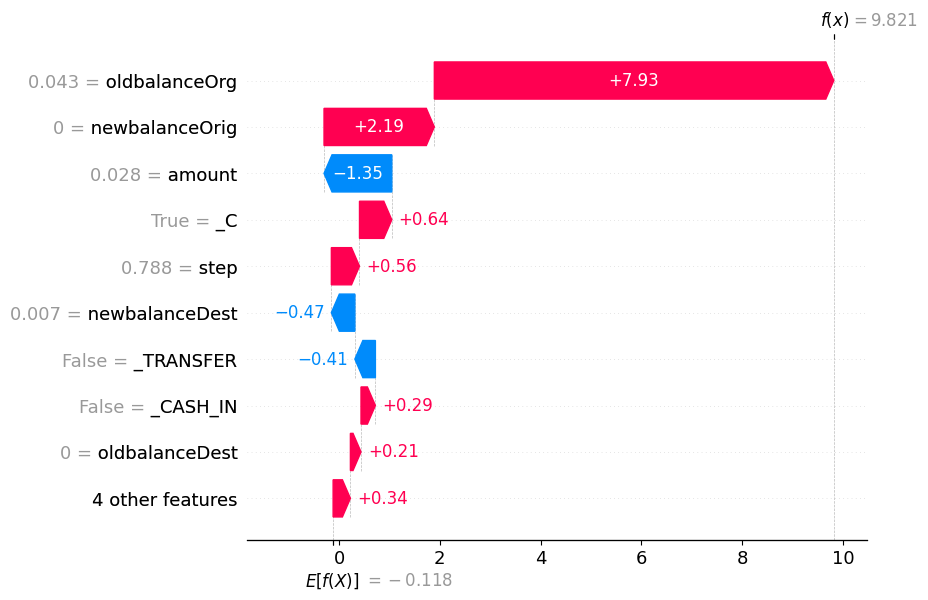

In [ ]:
for i in range(5):
  print("Prediciton number:" , i)
  print(y_predLGBM[i], y_test.iloc[i])
  print("-----------------------------")
  shap.plots.waterfall(shap_values_2[i])

Belows code takes too long on every run so commented out

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV


# param_grid = {'C': [0.1, 1, 10],
#               'kernel': ['linear', 'rbf', 'poly'],
#               'gamma': ['scale', 'auto', 0.1, 1]}


# grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')


# grid_search.fit(X_train, y_train)


# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Best Parameters:", best_params)
# print("Accuracy:", accuracy)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9902605308010713

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2040
           1       0.99      0.99      0.99      2067

    accuracy                           0.99      4107
   macro avg       0.99      0.99      0.99      4107
weighted avg       0.99      0.99      0.99      4107


Confusion Matrix:
[[2014   26]
 [  14 2053]]


In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(150,100 ))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['Not Fraud', 'Fraud'],
          filled=True,
          rounded=True)
plt.show()

Testing best performing models on orignal big data set without having equal fraud and non fraud transactions

In [105]:
final_analysis_data_set = df2.sample(n=1000000)
final_analysis_data_set.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5570286  0.528302  0.000050       0.000008        0.000000        0.000000   
633849   0.045822  0.000206       0.001733        0.001699        0.000660   
1770078  0.216981  0.000537       0.000000        0.000000        0.000167   
2508235  0.274933  0.001072       0.131131        0.159575        0.003324   
3829056  0.378706  0.000994       0.000000        0.000000        0.000836   

         newbalanceDest  isFraud  isFlaggedFraud  _CASH_IN  _CASH_OUT  _DEBIT  \
5570286        0.000000        0               0     False      False   False   
633849         0.000714        0               0     False       True   False   
1770078        0.000486        0               0     False       True   False   
2508235        0.003045        0               0      True      False   False   
3829056        0.001094        0               0     False       True   False   

         _PAYMENT  _TRANSFER     _C  
5570286      True      False  False  
633849      False      False   True  
1770078     False      False   True  
2508235     False      False   True  
3829056     False      False   True

In [106]:
final_analysis_data_set[final_analysis_data_set['isFraud'] == 1]['isFraud'].count()

1285

Very highly disblaced set 2:998 transaction (for thousand)
15:99985 for 10k data set

model will surely not work as expected




In [107]:
X_test_final = final_analysis_data_set.drop('isFraud', axis=1)
y_test_final = final_analysis_data_set['isFraud']

In [108]:
y_predict_lgbm_final = modelLGBM.predict(X_test_final)

In [109]:
accuracyLGBM_final = accuracy_score(y_test_final, y_predict_lgbm_final)
print("AccuracyLGBM:", accuracyLGBM_final)
print("\nClassification ReportLGBM:")
print(classification_report(y_test_final, y_predict_lgbm_final))
print("\nConfusion MatrixLGBM:")
print(confusion_matrix(y_test_final, y_predict_lgbm_final))

AccuracyLGBM: 0.991726

Classification ReportLGBM:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    998715
           1       0.13      1.00      0.24      1285

    accuracy                           0.99   1000000
   macro avg       0.57      1.00      0.62   1000000
weighted avg       1.00      0.99      0.99   1000000


Confusion MatrixLGBM:
[[990442   8273]
 [     1   1284]]


In [110]:
y_predict_xgb_final = modelXGB.predict(X_test_final)

In [111]:
accuracyXGB_final = accuracy_score(y_test_final, y_predict_xgb_final)
print("AccuracyXGB: ", accuracyXGB_final)

AccuracyXGB:  0.990801


In [112]:
print("\nClassification ReportXGB: ")
print(classification_report(y_test_final, y_predict_xgb_final))


Classification ReportXGB: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    998715
           1       0.12      1.00      0.22      1285

    accuracy                           0.99   1000000
   macro avg       0.56      0.99      0.61   1000000
weighted avg       1.00      0.99      0.99   1000000



In [113]:
print("\nConfusion Matrix XGB:")
print(confusion_matrix(y_test_final, y_predict_xgb_final))


Confusion Matrix XGB:
[[989518   9197]
 [     2   1283]]


Worked supprisingly good


In [136]:
print(X_test_final[0:1])
print(y_test_final[0:1])
print(y_predict_lgbm_final[0:1])

             step   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
5570286  0.528302  0.00005       0.000008             0.0             0.0   

         newbalanceDest  isFlaggedFraud  _CASH_IN  _CASH_OUT  _DEBIT  \
5570286             0.0               0     False      False   False   

         _PAYMENT  _TRANSFER     _C  
5570286      True      False  False  
5570286    0
Name: isFraud, dtype: int64
[0]


In [130]:
input_values = []
for feature in X_test_final.columns:
    value = input(f"Enter value for {feature}: ")
    try:
        value = float(value)
    except ValueError:
        value = bool(value)
    input_values.append(value)

Enter value for step: 0.5
Enter value for amount: 0.00005
Enter value for oldbalanceOrg: 0.000008
Enter value for newbalanceOrig: 0.0
Enter value for oldbalanceDest: 0.0
Enter value for newbalanceDest: 0.0
Enter value for isFlaggedFraud: 0
Enter value for _CASH_IN: False
Enter value for _CASH_OUT: False
Enter value for _DEBIT: False
Enter value for _PAYMENT: True
Enter value for _TRANSFER: False
Enter value for _C: False


In [131]:
input_data = np.array(input_values).reshape(1, -1)

In [135]:
prediction = modelLGBM.predict(input_data)
print(prediction)

[1]


In [133]:
if prediction[0] == 0:
    print("Prediction: Non-Fraudulent Transaction")
else:
    print(prediction[0])
    print("Prediction: Fraudulent Transaction")

1
Prediction: Fraudulent Transaction
